# PART A

In [3]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plant-seedlings-classification/test/54b3afd58.png
/kaggle/input/plant-seedlings-classification/test/6049234e6.png
/kaggle/input/plant-seedlings-classification/test/82b5f4d33.png
/kaggle/input/plant-seedlings-classification/test/a0f37c726.png
/kaggle/input/plant-seedlings-classification/test/e0ec5b6a1.png
/kaggle/input/plant-seedlings-classification/test/1cfd91582.png
/kaggle/input/plant-seedlings-classification/test/456d507c0.png
/kaggle/input/plant-seedlings-classification/test/d6d31dcbe.png
/kaggle/input/plant-seedlings-classification/test/e1abb4ff9.png
/kaggle/input/plant-seedlings-classification/test/aa7d098d1.png
/kaggle/input/plant-seedlings-classification/test/e19673dc9.png
/kaggle/input/plant-seedlings-classif

# ****Import Library****

In [4]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import cv2
import imageio
import random
from glob import glob
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline

# **PART A**

# ****Data Loading and Visualizing****

<font size="5">About Data</font>
* Images are about plant seedlings at various stages of grown.
* Each image has a filename that is its unique id.
* The dataset comprises 12 plant species.
* The goal of the competition is to create a classifier capable of determining a plant's species from a photo. The list of species is as follows :
Black-grass, Charlock, Cleavers, Common Chickweed, Common wheat, Fat Hen, Loose Silky-bent, Maize, Scentless Mayweed, Shepherds Purse, Small-flowered Cranesbill, Sugar beet

Train Data : 4750 files & Test Data : 794 files



<font size="4">Load Train Data</font>

In [5]:
images_path = '/kaggle/input/plant-seedlings-classification/train/*/*.png'
images = glob(images_path)

img_size = 128
train_images = []
train_labels = []
for i in images:
    train_images.append(cv2.resize(cv2.imread(i), (img_size, img_size))) 
    train_labels.append(i.split('/')[-2])
train_X = np.asarray(train_images)
train_Y = pd.DataFrame(train_labels)

<font size="4">Show number of Train Data in each species</font>

In [6]:
train_Y.rename(columns={0:'species'},inplace=True)
_, train_count = np.unique(train_Y,return_counts=True)
df = pd.DataFrame(data = train_count)
a = train_Y['species'].unique()
a = a.tolist()
a.sort()
df['Index'] = a
df.columns = ['Train','Name']
df

,Train,Name
0,263,Black-grass
1,390,Charlock
2,287,Cleavers
3,611,Common Chickweed
4,221,Common wheat
5,475,Fat Hen
6,654,Loose Silky-bent
7,221,Maize
8,516,Scentless Mayweed
9,231,Shepherds Purse


[Text(0, 0, 'Scentless Mayweed'),
 Text(1, 0, 'Common wheat'),
 Text(2, 0, 'Charlock'),
 Text(3, 0, 'Black-grass'),
 Text(4, 0, 'Sugar beet'),
 Text(5, 0, 'Loose Silky-bent'),
 Text(6, 0, 'Maize'),
 Text(7, 0, 'Cleavers'),
 Text(8, 0, 'Common Chickweed'),
 Text(9, 0, 'Fat Hen'),
 Text(10, 0, 'Small-flowered Cranesbill'),
 Text(11, 0, 'Shepherds Purse')]

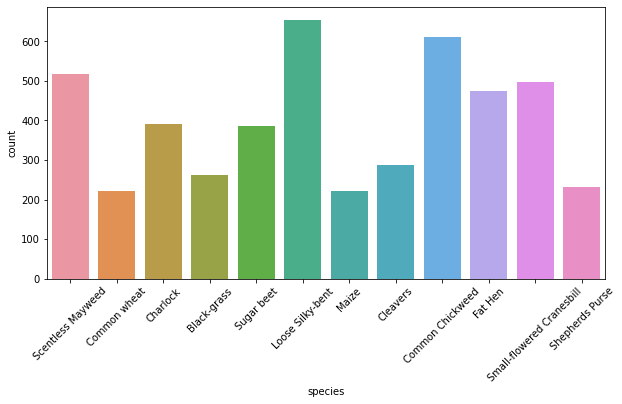

In [7]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=train_Y,
    x='species'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<font size="4">Show random sample of Train Images</font>

In [8]:
TRAIN_DIR = '../input/plant-seedlings-classification/train'
CLASSES = [folder[len(TRAIN_DIR) + 1:] for folder in glob(TRAIN_DIR + '/*')]
CLASSES.sort()

TARGET_SIZE = (64, 64)
TARGET_DIMS = (64, 64, 3) # add channel for RGB
N_CLASSES = 42
VALIDATION_SPLIT = 0.1
BATCH_SIZE = 64

In [9]:
def plot_one_sample_of_each(base_path):
    cols = 4
    rows = int(np.ceil(len(CLASSES) / 3))
    fig = plt.figure(figsize=(16, 20))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(imageio.imread(imgs[0]))
        plt.title(cls)
        sp.axis('off')

    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


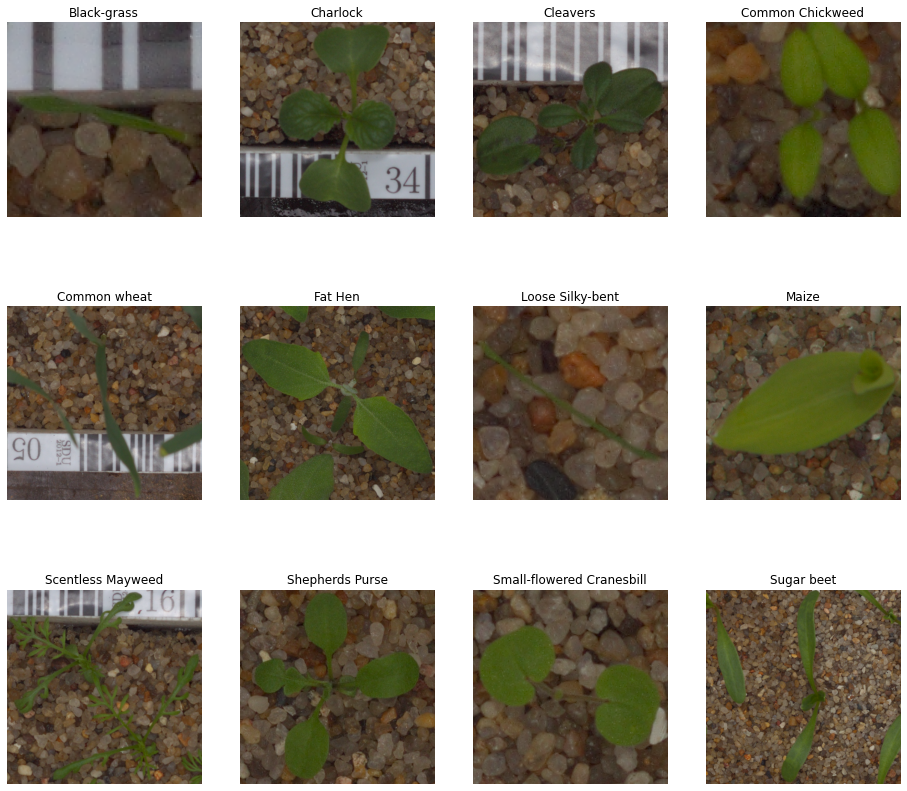

In [10]:
plot_one_sample_of_each(TRAIN_DIR)

# Data Preprocessing

<font size="4">LabelEncoding </font>


Encode labels to one hot vectors

In [11]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(train_Y.species)
train_label = np.array(y,dtype=np.float32)
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

<font size="4">Split Train Data & Validation Data</font>

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_X, train_label,test_size=0.3,random_state=7)

<font size="4">Image Normalization </font>

Image normalization is a typical process in image processing that changes the range of pixel intensity values. Its normal purpose is to convert an input image into a range of pixel values that are more familiar or normal to the senses, hence the term normalization.

In [13]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255 

<font size="4">ImageDataGenerator</font>

To expand dataset so that it will help to train our model better with a large dataset and reduce the problem of overfitting. So to increase the ability and performance of your model, or to generalize our model we need a proper dataset so that we can train our model

In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(train_X)

# Build CNN Model

In [15]:
from os import listdir
from os.path import isfile, join
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D
import matplotlib.pyplot as plt

In [16]:
model0 = Sequential ([
(Conv2D(32, kernel_size=(3, 3),
            activation = 'relu',
            kernel_initializer='he_normal',
            input_shape=(128,128,3))),
MaxPooling2D((2,2)),(Dropout(0.25)),
Conv2D(64,
        kernel_size=(3,3),
        activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.3),
Conv2D(128, (3,3), activation='relu'),
Dropout(0.40),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(12, activation = 'softmax')]) #output layer have 12 neurons with softmax activation function


display the architecture of the model

In [17]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [18]:
#Saving the best model using model checkpoint callback
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
model0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 32
epochs = 30

<font size="4">Fit Model</font>

In [20]:
history = model0.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(X_test, y_test),
           callbacks = [early_stopping,checkpoint],
                     verbose = 1)

Epoch 1/30
104/104 [==============================] - 47s 438ms/step - loss: 2.5862 - accuracy: 0.1164 - val_loss: 2.4130 - val_accuracy: 0.1782

Epoch 00001: val_accuracy improved from -inf to 0.17825, saving model to plant_classifier.h5
Epoch 2/30
104/104 [==============================] - 45s 435ms/step - loss: 2.3118 - accuracy: 0.1943 - val_loss: 1.9805 - val_accuracy: 0.3221

Epoch 00002: val_accuracy improved from 0.17825 to 0.32211, saving model to plant_classifier.h5
Epoch 3/30
104/104 [==============================] - 45s 437ms/step - loss: 1.7374 - accuracy: 0.4075 - val_loss: 1.5430 - val_accuracy: 0.4940

Epoch 00003: val_accuracy improved from 0.32211 to 0.49404, saving model to plant_classifier.h5
Epoch 4/30
104/104 [==============================] - 45s 430ms/step - loss: 1.3611 - accuracy: 0.5335 - val_loss: 1.2014 - val_accuracy: 0.6154

Epoch 00004: val_accuracy improved from 0.49404 to 0.61544, saving model to plant_classifier.h5
Epoch 5/30
104/104 [===============

<font size="4">Show Model accuracy and loss</font>

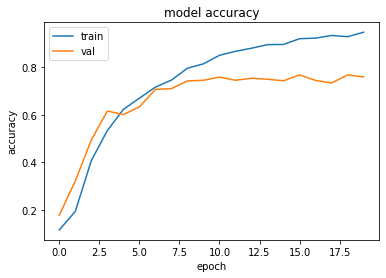

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

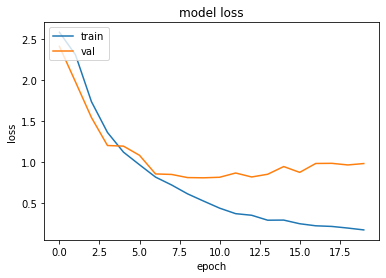

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<font size="4">Evaluate Model</font>

In [23]:
loss, acc = model0.evaluate(X_test,y_test)
loss1, acc1 = model0.evaluate(X_train,y_train)
print('Test loss:', loss,'   Test accuracy:', acc)
print('Train loss:', loss1,'   Train accuracy:',acc1)

104/104 [==============================] - 10s 94ms/step - loss: 0.0332 - accuracy: 0.9940
Test loss: 0.9808851480484009    Test accuracy: 0.7585964798927307
Train loss: 0.033185914158821106    Train accuracy: 0.9939849376678467


<font size="4">Predict train model</font>

In [24]:
predictions = model0.predict(X_test)

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% \n({})".format(np.array(df.Name)[predicted_label],
                                100*np.max(predictions_array),
                                np.array(df.Name)[true_label]),
                                color=color)


<font size="4">Show sample image of Train Prediction</font>

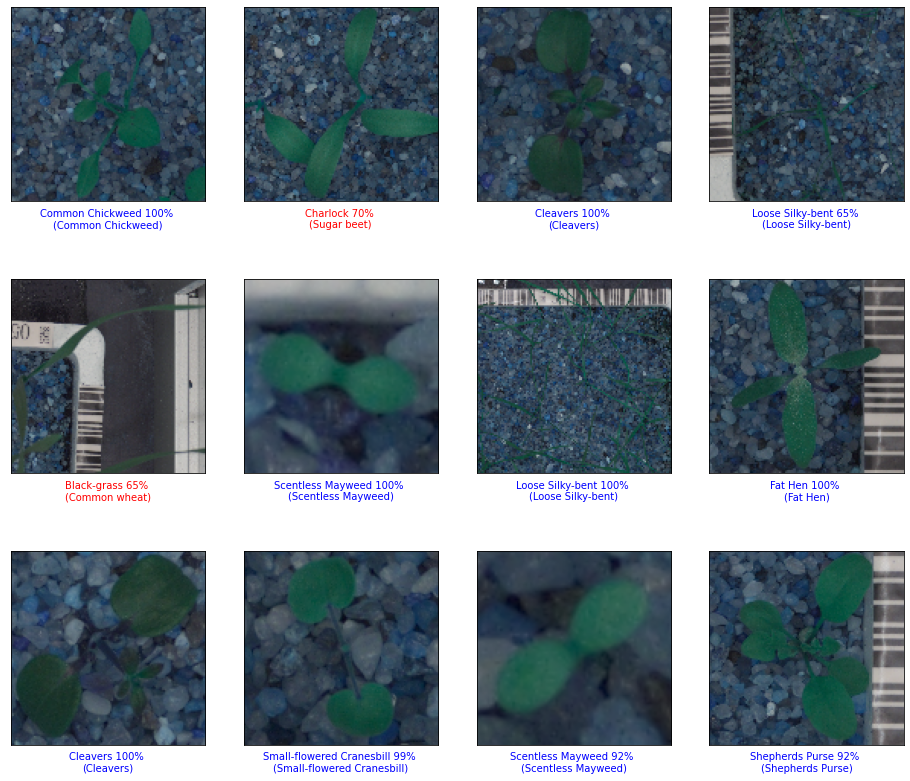

In [26]:
fig=plt.figure(figsize=(16, 20))
rows, cols = 3,4
for i in range(0, cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplots_adjust(hspace=-0.5)
plt.show()

# Predict Test Data

In [27]:
test_images_path = '/kaggle/input/plant-seedlings-classification/test/*.png'
test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:
    test_images_arr.append(cv2.resize(cv2.imread(img), (128, 128)))
    test_files.append(img.split('/')[-1])

test_X = np.asarray(test_images_arr)

In [28]:
predictions = model0.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = np.array(df.Name)[preds]
final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions

,file,species
0,fd87b36ae.png,Loose Silky-bent
1,0e8492cb1.png,Scentless Mayweed
2,8d6acbe9b.png,Common Chickweed
3,54b3afd58.png,Cleavers
4,6049234e6.png,Loose Silky-bent
...,...,...
789,4c7838de4.png,Common Chickweed
790,fda39e16f.png,Loose Silky-bent
791,da4ed3a28.png,Charlock
792,a83820a2c.png,Sugar beet


In [29]:
final_predictions.to_csv("Plant-Seedlings-Classification.csv", index=False)

<font size="4">Show sample result image of Test prediction</font>

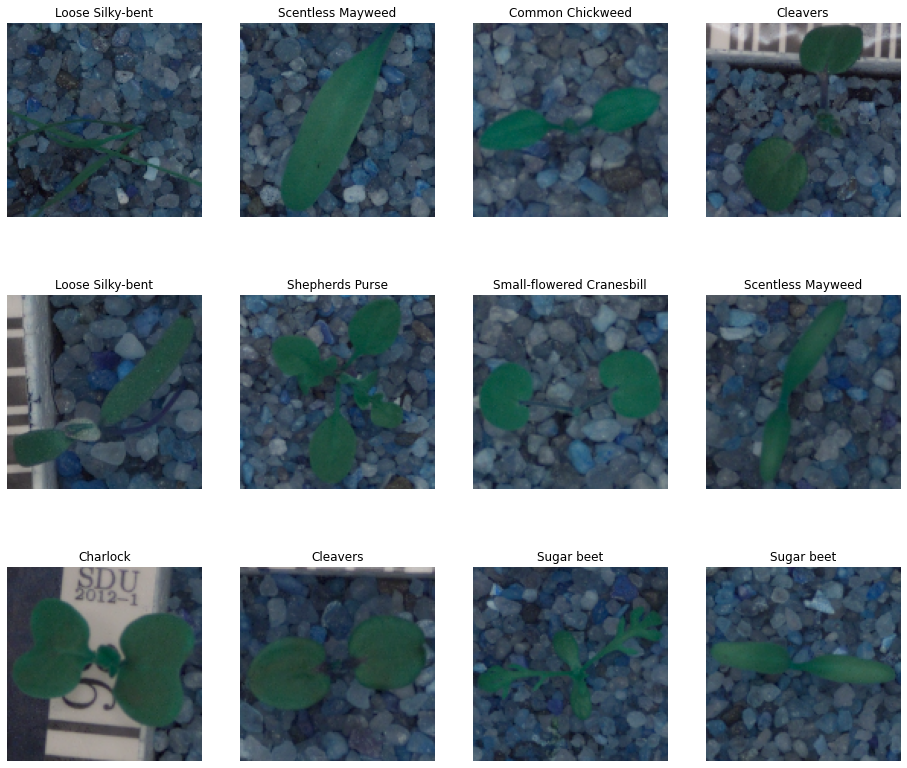

In [30]:
fig=plt.figure(figsize=(16, 20))
rows, cols = 3,4
for i in range(0, cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.title(final_predictions.species[i])
    plt.imshow(test_X[i])
    plt.axis('off')
    plt.subplots_adjust(hspace= - 0.5)
    
plt.show()